# FBA Quant FE Session HW1

## Woohyuk Choi

- Handwriting Answers for Theoretical Problems


# Problem 4-(c)

- Simulate 𝑀 = 10,000 trajectories of the stock price 𝑆𝑡 for 𝑡 = 0, 1, . . . , 10. Plot 10
pairs of trajectories of the stock and calculate the probability that the stock’s price exceeds 105 after 10 days.

- Today's Stock price is 100, and variance is 1, then by using Monte Carlo simulation..

In [1]:
# import statistics for calculating e.g. standard deviation of price history
import statistics as stat
# import pyplot for plotting
import matplotlib.pyplot as plt
# import random for random number generations
import random as rnd

In [2]:
std_prices = 1

Text(0, 0.5, 'stock price')

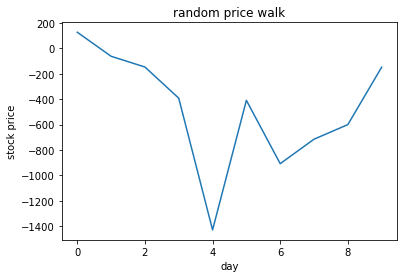

In [3]:
# modeling a random price walk over 100 days
# -- conduct calculation, define function
def randomWalk(stdev):
    days = [i for i in range(0,10)]
    prices = []
    price = 100
    for i in range(0,10):
        price = price + price*rnd.normalvariate(0,stdev)
        prices.append(price)
    return([days,prices])
# -- conduct calculation, use function
prices = randomWalk(std_prices)
# -- visualize random walk in a line plot
plt.plot(prices[0],prices[1])
plt.title("random price walk")
plt.xlabel("day")
plt.ylabel("stock price")

Text(0, 0.5, 'stock price')

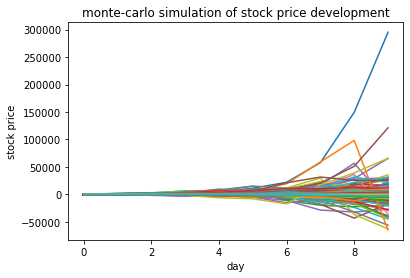

In [4]:
plt.figure()
for i in range(0,10000):
    prices = randomWalk(std_prices)
    plt.plot(prices[0],prices[1])
        
plt.title("monte-carlo simulation of stock price development")
plt.xlabel("day")
plt.ylabel("stock price")

## Problem 5-a)
- Newton's Method

In [5]:

import time

start = time.time()

def f(x):
    return x**2 + x - 1
def df(x):
    return 2*x + 1

def newton(lambda_0,e,N):
    print('\n\n*** NEWTON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        if df(lambda_0) == 0.0:
            print('Error! Try it again.')
            break
        
        lambda_1 = lambda_0 - f(lambda_0)/df(lambda_0)
        print('Iteration no.%d, lambda_1 = %0.6f and f(lambda_1) = %0.6f' % (step, lambda_1, f(lambda_1)))
        lambda_0 = lambda_1
        step = step + 1
        
        if step > N:
            flag = 0
            break
        
        condition = abs(f(lambda_1)) > e
    
    if flag==1:
        print('\nRequired root : %0.7f' % lambda_1)
    else:
        print('\nNot Convergent, Try it again.')

lambda_0 = 1
e = 0.000001
N = 10

newton(lambda_0,e,N)

end = time.time()
print("\ncomputation time :")
print(end - start , "s")



*** NEWTON METHOD IMPLEMENTATION ***
Iteration no.1, lambda_1 = 0.666667 and f(lambda_1) = 0.111111
Iteration no.2, lambda_1 = 0.619048 and f(lambda_1) = 0.002268
Iteration no.3, lambda_1 = 0.618034 and f(lambda_1) = 0.000001
Iteration no.4, lambda_1 = 0.618034 and f(lambda_1) = 0.000000

Required root : 0.6180340

computation time :
0.000453948974609375 s


## Problem 5-(b)
- Bisection Method

In [6]:
import numpy as np

def my_bisection(f, a, b, tol): 
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "Does not Converge! Try it again. ")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        return my_bisection(f, a, m, tol)

In [7]:
import time

start = time.time()
f = lambda x: x**2 + x - 1

root = my_bisection(f, 0, 2, 0.000001)
print("root =", root)

end = time.time()
print("\ncomputation time :")
print(end - start , "s")


root = 0.6180343627929688

computation time :
0.0008959770202636719 s
